


# **Palindrome Justification**

1. Azka Widya Rahmawati - 2311110054 (S1SD-04-02)
2. Jeti Aprilia - 2311110059 (S1SD-04-02)

## Deskripsi
Sebuah program yang dapat menerima input string dari pengguna dan otomatis mengecek apakah kata atau kalimat tersebut adalah palindrom. Palindrom sendiri ialah sebuah kata, bilangan, frasa, atau susunan karakter yang jika dibaca dari depan maupun belakang akan tetap dibaca sama. Dalam program ini, pengguna diminta memasukkan kata atau kalimat, dengan menggunakan algoritma rekursif dan iterative.

In [ ]:
import time
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Iterative palindrome check
def iterative_palindrome(s):
    n = len(s)

    for i in range(n // 2):
        if s[i] != s[n - i - 1]:
            return False
    return True

In [ ]:
# Recursive palindrome check
def recursive_palindrome(s):
    if len(s) <= 1:
        return True
    if s[0] != s[-1]:
        return False
    return recursive_palindrome(s[1:-1])

In [ ]:
# Function to measure execution time
def measure_time(func, input_string):
    start_time = time.time()
    result = func(input_string)
    end_time = time.time()
    return end_time - start_time, result

Masukkan kata atau kalimat untuk dicek: buku
'buku' bukan palindrom.
 n  Recursive Time (s)  Iterative Time (s)
 1        2.145767e-06        2.622604e-06
 2        9.536743e-07        1.907349e-06
 3        4.768372e-07        1.192093e-06
 4        4.768372e-07        7.152557e-07


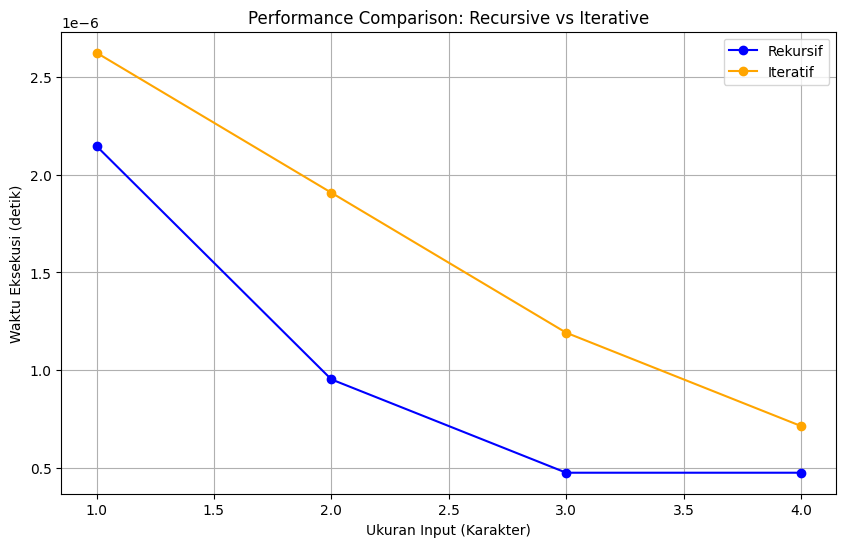

In [ ]:
# Iterative palindrome check
def iterative_palindrome(s):
    n = len(s)
    for i in range(n // 2):
        if s[i] != s[n - i - 1]:
            return False
    return True

# Recursive palindrome check
def recursive_palindrome(s):
    if len(s) <= 1:
        return True
    if s[0] != s[-1]:
        return False
    return recursive_palindrome(s[1:-1])

# Measure execution time
def measure_time(func, input_string):
    start_time = time.time()
    result = func(input_string)
    end_time = time.time()
    return end_time - start_time, result

# Program utama
def main():
    # Meminta input dari pengguna
    user_input = input("Masukkan kata atau kalimat untuk dicek: ").strip()
    if not user_input:
        print("Input kosong. Program selesai.")
        return

    # Pembersihan string untuk menghilangkan spasi dan tanda baca
    cleaned_input = ''.join(filter(str.isalnum, user_input)).lower()

    # Ukuran string
    input_size = len(cleaned_input)
    if input_size == 0:
        print("Input tidak valid setelah pembersihan. Program selesai.")
        return

    # Mengecek apakah input adalah palindrom (langsung untuk output awal)
    is_palindrome_iterative = iterative_palindrome(cleaned_input)
    is_palindrome_recursive = recursive_palindrome(cleaned_input)

    if is_palindrome_iterative:
        print(f"'{user_input}' adalah palindrom.")
    else:
        print(f"'{user_input}' bukan palindrom.")

    # Menyimpan data waktu untuk tabel dan grafik
    iterative_times = []
    recursive_times = []
    input_sizes = []

    for size in range(1, input_size + 1):
        # Substring sesuai ukuran saat ini
        current_input = cleaned_input[:size]

        # Iterative time
        iterative_time, _ = measure_time(iterative_palindrome, current_input)
        iterative_times.append(iterative_time)

        # Recursive time
        recursive_time, _ = measure_time(recursive_palindrome, current_input)
        recursive_times.append(recursive_time)

        input_sizes.append(size)

    df = pd.DataFrame({
        'n': input_sizes,
        'Recursive Time (s)': recursive_times,
        'Iterative Time (s)': iterative_times
    })

    print(df.to_string(index=False))

    # Membuat grafik perbandingan
    plt.figure(figsize=(10, 6))
    plt.plot(input_sizes, recursive_times, label='Rekursif', marker='o', linestyle='-', color='blue')
    plt.plot(input_sizes, iterative_times, label='Iteratif', marker='o', linestyle='-', color='orange')
    plt.xlabel('Ukuran Input (Karakter)')
    plt.ylabel('Waktu Eksekusi (detik)')
    plt.title('Performance Comparison: Recursive vs Iterative')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()